In [72]:
from numpy import mean,std
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from matplotlib import pyplot

def get_dataset(n_samples=100):
    X, y = make_classification(n_samples=n_samples, n_features=8, n_informative=5, n_redundant=3, random_state=1)
    return X, y


Ideal: 0.900
> Folds = 2 , accuracy = 0.910 (0.900,0.920)
> Folds = 3 , accuracy = 0.900 (0.879,0.912)
> Folds = 4 , accuracy = 0.880 (0.800,0.960)
> Folds = 5 , accuracy = 0.900 (0.850,1.000)
> Folds = 6 , accuracy = 0.890 (0.812,1.000)
> Folds = 7 , accuracy = 0.891 (0.800,1.000)
> Folds = 8 , accuracy = 0.899 (0.833,1.000)
> Folds = 9 , accuracy = 0.920 (0.818,1.000)
> Folds = 10 , accuracy = 0.900 (0.700,1.000)
> Folds = 11 , accuracy = 0.869 (0.667,1.000)
> Folds = 12 , accuracy = 0.892 (0.667,1.000)
> Folds = 13 , accuracy = 0.887 (0.625,1.000)
> Folds = 14 , accuracy = 0.881 (0.625,1.000)
> Folds = 15 , accuracy = 0.897 (0.667,1.000)
> Folds = 16 , accuracy = 0.900 (0.667,1.000)
> Folds = 17 , accuracy = 0.898 (0.800,1.000)
> Folds = 18 , accuracy = 0.896 (0.800,1.000)
> Folds = 19 , accuracy = 0.900 (0.800,1.000)
> Folds = 20 , accuracy = 0.890 (0.400,1.000)
> Folds = 21 , accuracy = 0.888 (0.400,1.000)
> Folds = 22 , accuracy = 0.886 (0.400,1.000)
> Folds = 23 , accuracy = 0.8

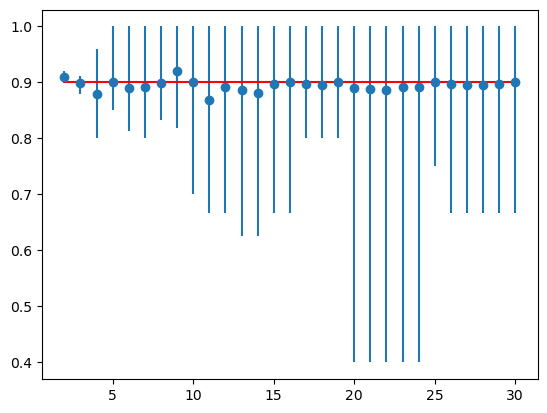

In [74]:
# create model
def get_model():
    model = LogisticRegression()
    return model 

# evaluate model
def evaluate_model(cv):
    X,y = get_dataset()
    model = get_model()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return mean(scores) , scores.min() , scores.max()

# calculate the ideal test condition without LeaveOneOut()
ideal, _, _ = evaluate_model(KFold(n_splits = 10,random_state=1,shuffle=True))
print('Ideal: %.3f' % ideal)

# define folds to test
folds = range(2,31)

# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()

#evaluate each k value
for k in folds:
    #define the test condation
    cv = KFold(n_splits=k , shuffle=True , random_state = 1)
    k_mean , k_min , k_max = evaluate_model(cv)
    print('> Folds = %d , accuracy = %.3f (%.3f,%.3f)' % (k,k_mean,k_min,k_max))
    means.append(k_mean)
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
    

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
pyplot.show()